In [14]:
import pandas as pd
import numpy as np
import mplfinance as mpf

df = pd.read_csv("./BTC-USD.csv", index_col='Date', parse_dates=True)
df

,open,high,low,close,adj close,volume
Date,,,,,,
2023-01-16,20882.224609,21360.875000,20715.746094,21169.632812,21169.632812,26792494050
2023-01-17,21175.833984,21438.660156,20978.533203,21161.519531,21161.519531,24999983362
2023-01-18,21161.050781,21564.501953,20541.544922,20688.781250,20688.781250,30005625418
2023-01-19,20686.746094,21163.011719,20685.380859,21086.792969,21086.792969,21152848261
2023-01-20,21085.373047,22692.357422,20919.126953,22676.552734,22676.552734,28799154319
...,...,...,...,...,...,...
2023-04-12,30231.582031,30462.480469,29725.574219,30139.052734,30139.052734,18651929926
2023-04-13,29892.740234,30539.845703,29878.623047,30399.066406,30399.066406,17487721001
2023-04-14,30409.562500,31005.607422,30044.498047,30485.699219,30485.699219,22659995079


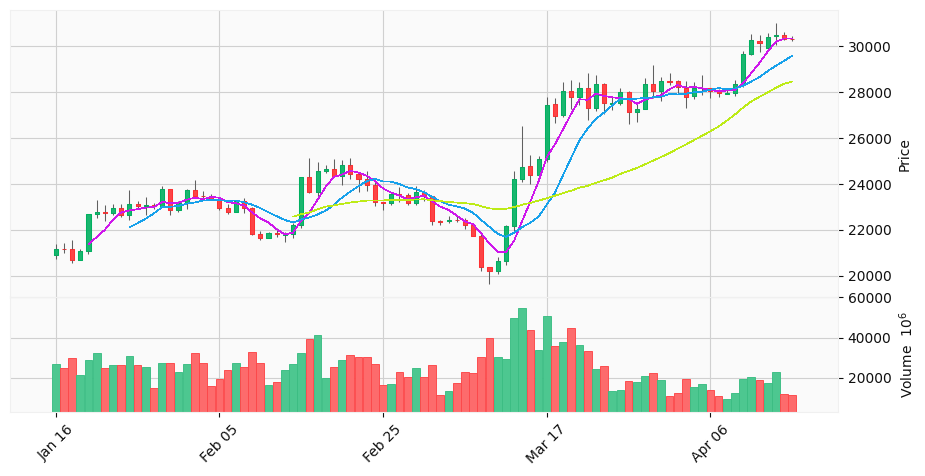

In [21]:
# manual implementration
def calc_ma(prices, dates, window_size):
    moving_averages = []
    i = 0
    while i < len(prices) - window_size + 1:
        # Store elements from i to i+window_size
        # in list to get the current window
        window = prices[i : i + window_size]

        # Calculate the average of current window
        window_average = round(sum(window) / window_size, 2)

        # Store the average of current
        # window in moving average list,
        date = dates[i+window_size -1]
        date = str(np.datetime_as_string(date, unit='D'))
        moving_averages.append((date, window_average))

        # Shift window to right by one position
        i += 1
    return moving_averages
    
prices = df['close'].to_list()
dates = df.index.values

ma_lines = dict(alines= [calc_ma(prices,dates, 5), calc_ma(prices,dates, 10), calc_ma(prices,dates, 30), ], colors=['#ce17eb','#17a1eb', '#bdeb17'],linewidths=(0.5,0.5,0.5))

mpf.plot(df, type='candle', style='yahoo', volume=True, figratio=(8,4), alines = ma_lines)

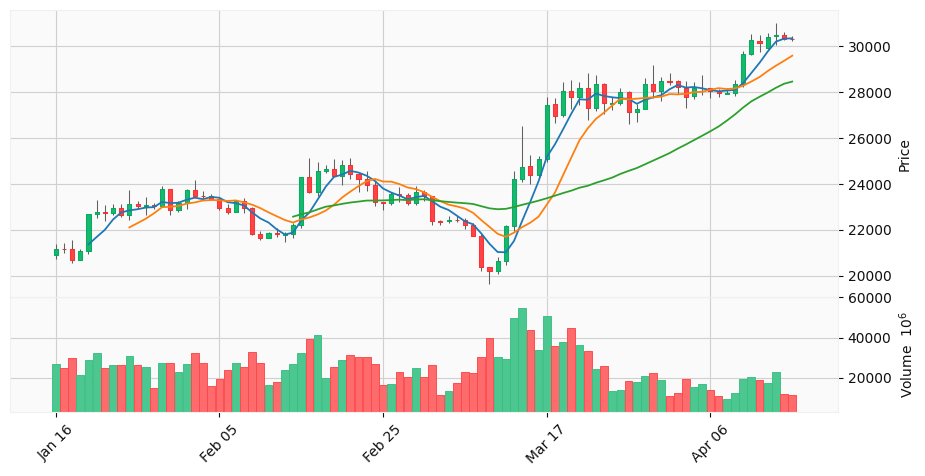

In [23]:
# one-line using libs methods
mpf.plot(df, type='candle', style='yahoo', volume=True, figratio=(8,4),mav=(5, 10, 30))